## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set()

## Generating the Dataset

In [39]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2)
X=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

## 1.Perceptron Algorithm (Using Stochastic)
If x is a point of missclassification,

if y is 1, w=w+x

else w=w-x

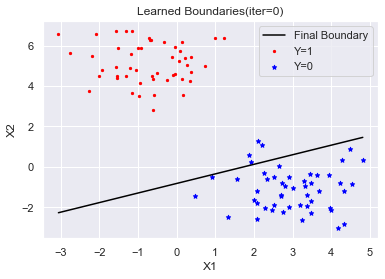

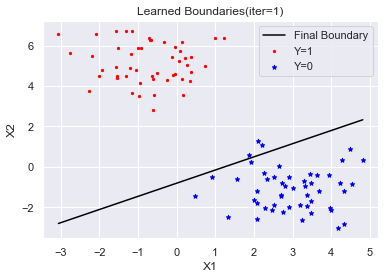

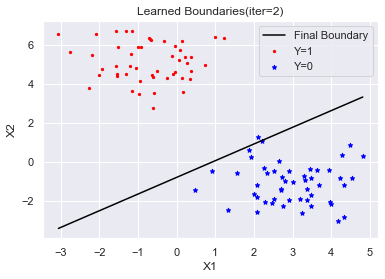

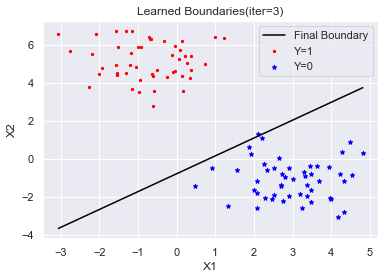

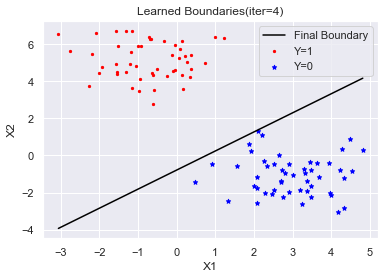

In [44]:
def plot_data(X,Y,w,iter):
    #Setting the size of the plot
    plt.figure(figsize=(6,4))

    #Plotting the given data
    pos_data=X[Y==1]
    neg_data=X[Y==0]
    plt.scatter(pos_data[:,1],pos_data[:,2],s=20,marker='.',color='red',label='Y=1')
    plt.scatter(neg_data[:,1],neg_data[:,2],s=20,marker='*',color='blue',label='Y=0')

    #Generating equal distanced points
    x1=np.linspace(min(X[:,1]),max(X[:,1]),1000)

    #Plotting the Hyperplane
    x2=(-w[0]-w[1]*x1)/w[2]
    plt.plot(x1,x2,color='black',label="Final Boundary")

    #Labelling the plot
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend(loc='upper right')
    plt.title("Learned Boundaries(iter={})".format(iter))
    plt.show()
def Perceptron(X,Y):
    w=np.random.uniform(1,100,size=X.shape[1])
    false_found=True
    iter=0
    while false_found:
        false_found=False
        for i in range(X.shape[0]):
            parity=np.sum(X[i]*w)>=0
            if parity!=Y[i]:
                if Y[i]>0:
                    w+=X[i]
                else:
                    w-=X[i]
                false_found=True
        if false_found or iter==0:
            plot_data(X,Y,w,iter)
        iter+=1
    return w
w=Perceptron(X,Y)

## 2.Perceptron Algorithm (Using Batch)

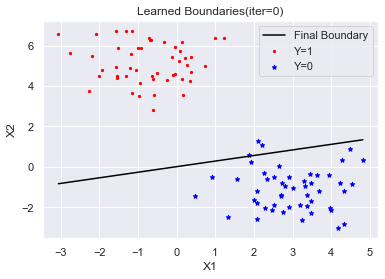

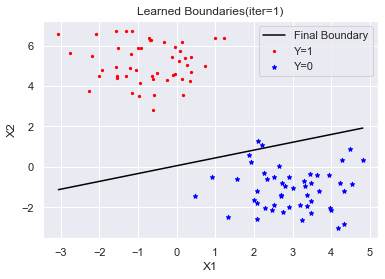

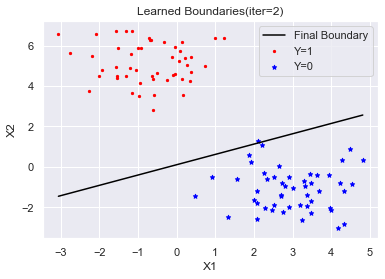

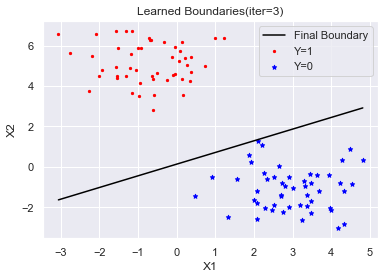

In [45]:
def Perceptron_Batch(X,Y,step_size=0.5):
    for i in range(X.shape[0]):
        if(Y[i]==0):
            X[i]*=-1
    w=np.random.uniform(1,100,size=X.shape[1])
    false_found=True
    iter=0
    while false_found:
        false_found=False
        temp=np.zeros(X.shape[1])
        for i in range(X.shape[0]):
            parity=np.sum(X[i]*w)
            if parity<0:
                temp+=X[i]
                false_found=True
        w+=step_size*temp
        if false_found or iter==0:
            plot_data(X,Y,w,iter)
        iter+=1
    return w
w=Perceptron(X,Y)